In [56]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

# 1. Carregando os dados 

In [57]:
# life satisfaction: mostra o nível de satisfação com a vida das pessoas 
# em cada país (indicadores de bem-estar), geralmente em média para a população total.
lifesat = pd.read_csv("../datasets/lifesat.csv")
lifesat

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


In [58]:
# GDP per capita: mostra a riqueza média por pessoa em cada país, medida pelo PIB per capita.
gdp_per_capita = pd.read_csv("../datasets/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


# 2. Tratamento de dados

In [59]:
def prepare_country_stats(lifesat, gdp_per_capita):
    # Mantém apenas os registros referentes ao total da população (sem recortes de desigualdade)
    lifesat = lifesat[lifesat["INEQUALITY"] == "TOT"]

    # Reorganiza o dataframe:
    # - cada país vira uma linha
    # - cada indicador vira uma coluna
    # - os valores vêm da coluna "Value"
    lifesat = lifesat.pivot(
        index="Country",
        columns="Indicator",
        values="Value"
    )

    # Renomeia a coluna "2015" para um nome mais descritivo
    gdp_per_capita.rename(
        columns={"2015": "GDP per capita"},
        inplace=True
    )

    # Define a coluna "Country" como índice para permitir o merge pelo país
    gdp_per_capita.set_index("Country", inplace=True)

    # Junta os dois dataframes usando o índice (Country)
    # Apenas países presentes nos dois conjuntos são mantidos
    full_country_stats = pd.merge(
        left=lifesat,
        right=gdp_per_capita,
        left_index=True,
        right_index=True
    )

    # Ordena os países do menor para o maior PIB per capita
    full_country_stats.sort_values(
        by="GDP per capita",
        inplace=True
    )

    return full_country_stats[
        ["GDP per capita", "Life satisfaction"]
    ]

country_stats = prepare_country_stats(lifesat, gdp_per_capita)
country_stats

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Chile,13340.905,6.7
Slovak Republic,15991.736,6.1
Czech Republic,17256.918,6.5


# 3. Plotando gráficos

In [60]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
print("Vetor coluna com os valores de 'GDP per capita' (3 primeiros elementos):")
print(X[:3])
print("\n")
print("Vetor coluna com os valores de 'Life satisfaction' (3 primeiros elementos):")
print(y[:3])


Vetor coluna com os valores de 'GDP per capita' (3 primeiros elementos):
[[8669.998]
 [9009.28 ]
 [9054.914]]


Vetor coluna com os valores de 'Life satisfaction' (3 primeiros elementos):
[[7. ]
 [6.7]
 [6. ]]


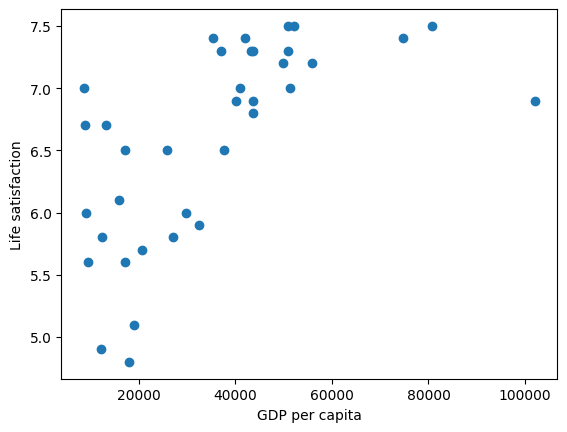

In [61]:
plt.scatter(x=X, y=y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.show()

# 4. Aplicando modelos

## 4.1 Regressão linear (Model-Based Learning)

In [ ]:
import sklearn.linear_model

# Selecionando o modelo
model = sklearn.linear_model.LinearRegression()

# Treinando o modelo
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [63]:
# Coeficientes angular da reta
a = model.coef_

# Coeficiente linear da reta 
b = model.intercept_

print("Coeficientes angular da reta: ", a)
print("Coeficiente linear da reta : ", b)

Coeficientes angular da reta:  [[2.3177337e-05]]
Coeficiente linear da reta :  [5.76302986]


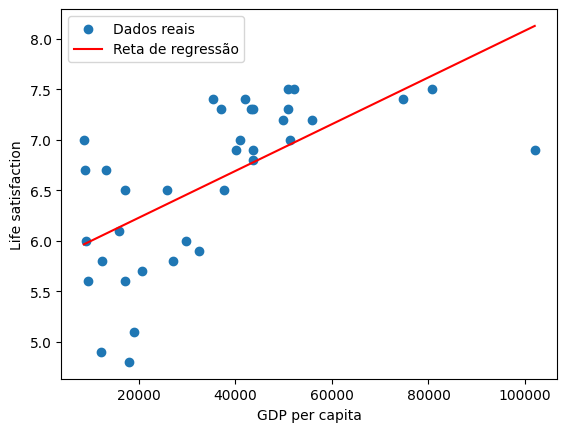

In [64]:
# Cria pontos para a reta
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

# Plot
plt.scatter(X, y, label="Dados reais")
plt.plot(X_line, y_line, label="Reta de regressão", color="red")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.legend()
plt.show()

## 4.2 K-Nearest Neighbors ou KNN (Instance-Based Learning)

In [70]:
import sklearn.neighbors

# Selecionando o modelo 
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Treinando o modelo
knn.fit(X, y)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


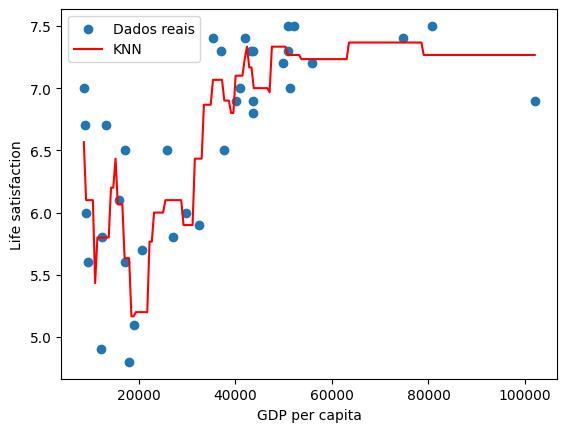

In [72]:
X_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred = knn.predict(X_line)

plt.scatter(X, y, label="Dados reais")
plt.plot(X_line, y_pred, color="red", label="KNN")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.legend()
plt.show()

## 4.3 Comparando os resultados

In [78]:
# Aplicando a predição sobre Chipre 
X_new = [[22587]]  # Chipre GDP per capita

chipre_linear_result = model.predict(X_new)
chipre_knn_result = knn.predict(X_new)
print("O resultado utilizando Regressão Linear: ", chipre_linear_result[0][0])
print("O resultado utilizando KNN com K = 3: ", chipre_knn_result[0][0])

O resultado utilizando Regressão Linear:  6.286536373197453
O resultado utilizando KNN com K = 3:  5.766666666666666



📈 Regressão Linear

🔹 Natureza do modelo

- Modelo paramétrico

- Aprende um conjunto fixo de parâmetros

- O conhecimento está nos coeficientes a e b

- Após o treino, o dataset original não é mais necessário para prever

- Assume que: a relação entre X e y é linear e a variância dos erros é aproximadamente constante para todos os valores de X

🔹 Viés vs Variância

- Alto viés

- Baixa variância

- Pouco sensível a ruído

- Pode errar sistematicamente se a relação não for linear

🔹 Custo computacional

- Treinamento caro, pois envolve otimização

- Previsão barata, pois só depende da equação

🔹 Interpretabilidade

- Altamente interpretável

- Cada coeficiente tem significado claro: impacto marginal da feature

🔹 Quando usar Regressão Linear

- Use Regressão Linear quando:

- relação aproximadamente linear

- poucos dados

- precisa de explicação clara

- produção em larga escala

